In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
print("Hello")
file_path = r"D:\Master of Data Science\business analytics\Data-Resources\Data & Resources\Data\Prediction_Data.xlsx"
print("Hello1")
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'
print("Hello2")
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)
print("Hello3")
# Display the first few rows of the fetched data
print(data.head())
print("Hello4")

Hello
Hello1
Hello2
Hello3
  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11850-MAH    Male   74     Yes     Maharashtra                    5   
1   11873-HAR    Male   45     Yes         Haryana                    9   
2   11878-RAJ    Male   75     Yes       Rajasthan                   15   
3   11882-BIH  Female   74      No           Bihar                   14   
4   11887-MAD  Female   33      No  Madhya Pradesh                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 6        NaN           Yes            Yes  ...   
1                10     Deal 2           Yes             No  ...   
2                17        NaN           Yes             No  ...   
3                15     Deal 5           Yes             No  ...   
4                33     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      75.150002   3480.350098 

In [68]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
# List of columns to be label encoded
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix:
[[800  47]
 [139 216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       847
           1       0.82      0.61      0.70       355

    accuracy                           0.85      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



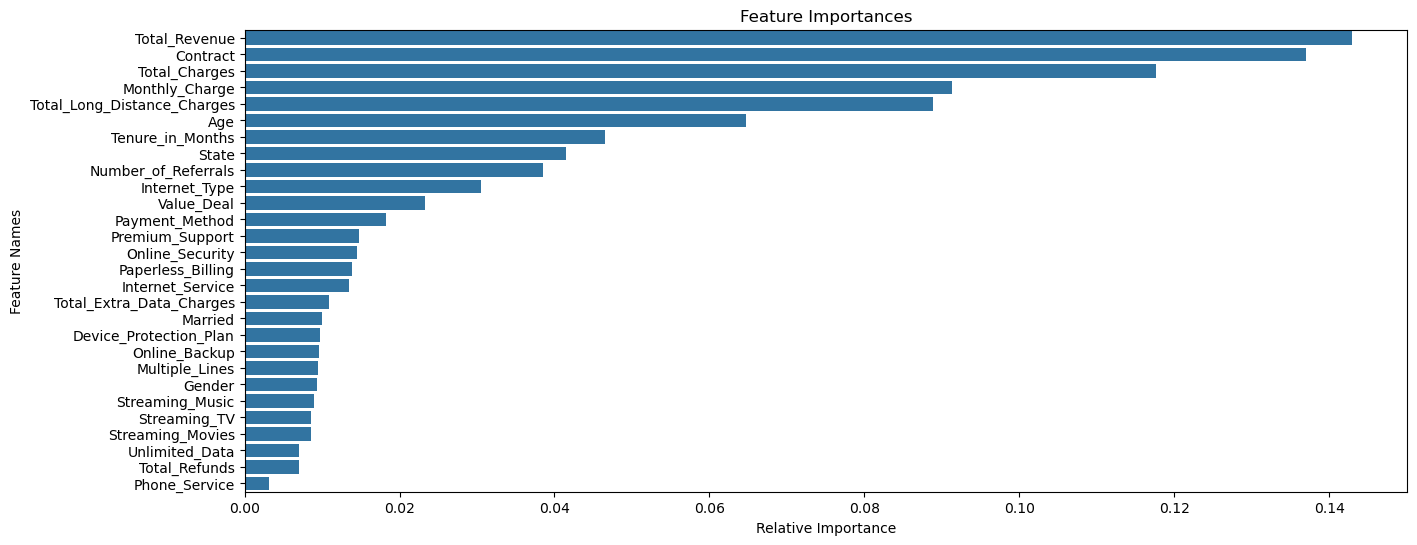

In [69]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [70]:
# Define the path to the Joiner Data Excel file
file_path = r"D:\Master of Data Science\business analytics\Data-Resources\Data & Resources\Data\Prediction_Data.xlsx"
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)
# Display the first few rows of the fetched data
#print(new_data.head())
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
# Make predictions
new_predictions = rf_model.predict(new_data)
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
print(original_data.head())
#print("HELLO1")
#original_data = new_data.copy()
# Save the results
original_data.to_csv(r"D:\Master of Data Science\business analytics\Data-Resources\Data & Resources\Data\Predictions.csv", index=False)
print("HELLO2")

   Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
2    11878-RAJ    Male   75     Yes       Rajasthan                   15   
3    11882-BIH  Female   74      No           Bihar                   14   
6    11906-MAD  Female   53      No  Madhya Pradesh                    2   
8    11920-HAR  Female   61     Yes         Haryana                   10   
11   11939-UTT    Male   65     Yes   Uttar Pradesh                    5   

    Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
2                 17        NaN           Yes             No  ...   
3                 15     Deal 5           Yes             No  ...   
6                 29        NaN           Yes             No  ...   
8                 24     Deal 5           Yes            Yes  ...   
11                 5        NaN           Yes             No  ...   

   Monthly_Charge Total_Charges Total_Refunds Total_Extra_Data_Charges  \
2       71.800003   1167.800049           0.0         

In [71]:
print(original_data.head())
print("hh")

   Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
2    11878-RAJ    Male   75     Yes       Rajasthan                   15   
3    11882-BIH  Female   74      No           Bihar                   14   
6    11906-MAD  Female   53      No  Madhya Pradesh                    2   
8    11920-HAR  Female   61     Yes         Haryana                   10   
11   11939-UTT    Male   65     Yes   Uttar Pradesh                    5   

    Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
2                 17        NaN           Yes             No  ...   
3                 15     Deal 5           Yes             No  ...   
6                 29        NaN           Yes             No  ...   
8                 24     Deal 5           Yes            Yes  ...   
11                 5        NaN           Yes             No  ...   

   Monthly_Charge Total_Charges Total_Refunds Total_Extra_Data_Charges  \
2       71.800003   1167.800049           0.0         